In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF Version :", tf.__version__)
print("TF-Hub Version:",hub.__version__)

TF Version : 2.15.0
TF-Hub Version: 0.16.1


In [ ]:
print("GPU","available" if tf.config.list_physical_devices("GPU") else "not available")

GPU not available


### Data Preprocesssing

In [ ]:
labels_csv = pd.read_csv("/content/drive/MyDrive/ML-Bootcamp/files/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
filenames = [f"/content/drive/MyDrive/ML-Bootcamp/files/train/{fname}.jpg"for fname in labels_csv["id"]]
filenames[:10]

['/content/drive/MyDrive/ML-Bootcamp/files/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/ML-Bootcamp/files/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/ML-Bootcamp/files/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/ML-Bootcamp/files/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/ML-Bootcamp/files/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/ML-Bootcamp/files/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/ML-Bootcamp/files/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/ML-Bootcamp/files/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/ML-Bootcamp/files/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/ML-Bootcamp/files/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

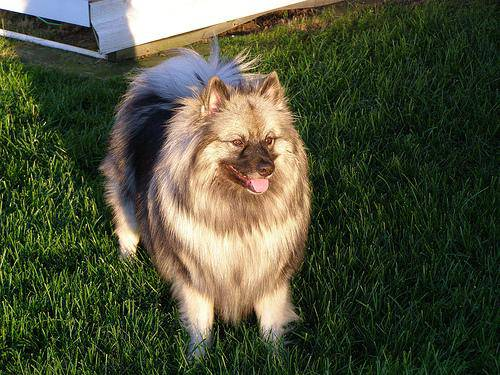

In [ ]:
from IPython.display import Image
Image(filenames[4500])

In [ ]:
labels = labels_csv["breed"]
labels

,breed
0,boston_bull
1,dingo
2,pekinese
3,bluetick
4,golden_retriever
5,bedlington_terrier
6,bedlington_terrier
7,borzoi
8,basenji
9,scottish_deerhound


In [ ]:
labels = labels.to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
unique_breeds = np.unique(labels)
unique_breeds.shape

(120,)

In [ ]:
# Turn every label into boolean array
boolean_labels = [label == unique_breeds for label in labels]
len(boolean_labels)

10222

In [ ]:
## Validation Set
X = filenames
y = boolean_labels

In [ ]:
NUM_IMAGES = 1000

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size = 0.2,random_state=42)

In [ ]:
len(X_train),len(X_val),len(y_train),len(y_val)

(800, 200, 800, 200)

In [ ]:
## Turning into Tensors
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image.max(),image.min()

(255, 0)

In [ ]:
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

In [ ]:
IMG_SIZE = 224
def process_image(image_path):
  image = tf.io.read_file(image_path)
  # Turn jpeg into Tensor
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the color channel values from 0-255 to 0-1
  image = tf.image.convert_image_dtype(image,tf.float32)
  # Resizing
  image = tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image

In [ ]:
## Turning our data into batches
def get_image_label(image_path,label):
  image = process_image(image_path)
  return image,label

In [ ]:
def create_data_batches(X, y=None, batch_size=32,valid_data=False,test_data=False):
  if test_data:
    print('Creating test data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(32)
    return data_batch

  elif valid_data:
    print('Creating validation data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    data_batch = data.map(get_image_label).batch(32)
    return data_batch

  else:
    print('Creating training data batches...')
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    data = data.shuffle(buffer_size=len(X))
    #Create (image,label) tuples
    data = data.map(get_image_label)

    data_batch = data.batch(32)
  return data_batch


In [ ]:
train_data = create_data_batches(X_train,y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch,height,width,color channels

OUTPUT_SHAPE = len(unique_breeds)

#Model URL
MODEL_URL = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2"

In [ ]:
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  print("Building Model with ",model_url)

  #Setup Architecture
  model = tf.keras.Sequential([
      hub.KerasLayer(model_url),
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation='softmax')
  ])

  #Compile model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )

  # Build Model
  model.build(input_shape)

  return model

In [ ]:
model = create_model()
model.summary()

Building Model with  https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_1 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [ ]:
# Creating CallBacks

## Callbacks are functions a model can use during training to do such things as save its progress,check its progress or stop training early


In [ ]:
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a tensorboard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("/content/drive/MyDrive/ML-Bootcamp/files/logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
## Early stopping Callback

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)

In [ ]:
# Training
NUM_EPOCHS = 100


In [ ]:
def train_model():
  model = create_model()

  tensorboard = create_tensorboard_callback()

  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stopping])

  return model